# Customer Personality Analysis

## Problem Statement


* Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
* Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About the Dataset
- The dataset for this project is a public dataset from Kaggle provided by Dr. Omar RomeroHernandez.
- This dataset has **2,240** rows of observations and **28** columns of variables. Among the variables, there are 5-categorical variables and 23 numerical variables.

**People:**

* `ID`: Customer's unique identifier
* `Year_Birth`: Customer's birth year
* `Education`: Customer's education level
* `Marital_Status`: Customer's marital status
* `Income`: Customer's yearly household income
* `Kidhome`: Number of children in customer's household
* `Teenhome`: Number of teenagers in customer's household
* `Dt_Customer`: Date of customer's enrollment with the company
* `Recency`: Number of days since customer's last purchase
* `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

**Products:**

* `MntWines`: Amount spent on wine in last 2 years
* `MntFruits`: Amount spent on fruits in last 2 years
* `MntMeatProducts`: Amount spent on meat in last 2 years
* `MntFishProducts`: Amount spent on fish in last 2 years
* `MntSweetProducts`: Amount spent on sweets in last 2 years
* `MntGoldProds`: Amount spent on gold in last 2 years

**Promotion:**

* `NumDealsPurchases`: Number of purchases made with a discount
* `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place:**

* `NumWebPurchases`: Number of purchases made through the company’s website
* `NumCatalogPurchases`: Number of purchases made using a catalogue
* `NumStorePurchases`: Number of purchases made directly in stores
* `NumWebVisitsMonth`: Number of visits to company’s website in the last month

## Importing the necessary libraries 

In [62]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [63]:
data = pd.read_csv('data/customer_data.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [65]:
data_dup = data 
data_dup

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Cleaning and Preparation

### 1. Size of the data  

In [66]:
data_dup.shape

(2240, 29)

In [67]:
data_dup.size

64960

In [68]:
data_dup.memory_usage(deep=True)

Index                     128
ID                      17920
Year_Birth              17920
Education              144522
Marital_Status         143524
Income                  17920
Kidhome                 17920
Teenhome                17920
Dt_Customer            150080
Recency                 17920
MntWines                17920
MntFruits               17920
MntMeatProducts         17920
MntFishProducts         17920
MntSweetProducts        17920
MntGoldProds            17920
NumDealsPurchases       17920
NumWebPurchases         17920
NumCatalogPurchases     17920
NumStorePurchases       17920
NumWebVisitsMonth       17920
AcceptedCmp3            17920
AcceptedCmp4            17920
AcceptedCmp5            17920
AcceptedCmp1            17920
AcceptedCmp2            17920
Complain                17920
Z_CostContact           17920
Z_Revenue               17920
Response                17920
dtype: int64

### 2. How the data looks like 

In [69]:
data_dup.head(10)
#displaying the first 10 rows 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [70]:
data_dup.tail(10)
#displaying the last 10 rows 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,2012-08-21,71,853,...,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [71]:
data_dup.sample(10)
#Diplays 10 random sample from the whole dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
870,10140,1983,PhD,Together,70123.0,0,0,2013-09-28,27,1308,...,3,0,1,0,0,1,0,3,11,0
361,9336,1969,PhD,Widow,62187.0,0,1,2014-03-22,38,512,...,4,0,0,0,0,0,0,3,11,0
313,6320,1976,Master,Single,70893.0,0,0,2013-02-06,42,768,...,3,0,0,0,0,0,0,3,11,0
1421,7000,1972,2n Cycle,Single,65704.0,0,0,2013-10-13,18,279,...,1,0,0,0,0,0,0,3,11,0
1058,4507,1952,Graduation,Single,72228.0,0,0,2012-11-27,87,631,...,3,0,0,0,0,0,0,3,11,0
1553,7321,1962,Graduation,Together,76081.0,0,0,2014-05-23,85,292,...,2,0,0,0,1,0,0,3,11,0
1381,7514,1956,2n Cycle,Together,54342.0,1,1,2013-07-03,74,84,...,6,0,0,0,0,0,0,3,11,0
1228,8210,1975,Master,Married,54730.0,0,1,2013-08-15,64,318,...,4,0,0,0,0,0,0,3,11,0
1943,10413,1984,Graduation,Married,72570.0,0,0,2014-04-25,67,274,...,1,0,0,0,0,0,0,3,11,0
594,3075,1972,PhD,Married,59973.0,0,0,2013-09-11,47,130,...,1,0,0,0,0,0,0,3,11,0


### 3.Data types of the attributes 

In [72]:
data_dup.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [73]:
data_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [74]:
data_dup.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### 4.How data looks mathematically

In [75]:
data_dup.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


### 5.Checking missing values 

In [76]:
data_dup.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

since there are some missing values in Income we will check that column and replace missing values with mean or median

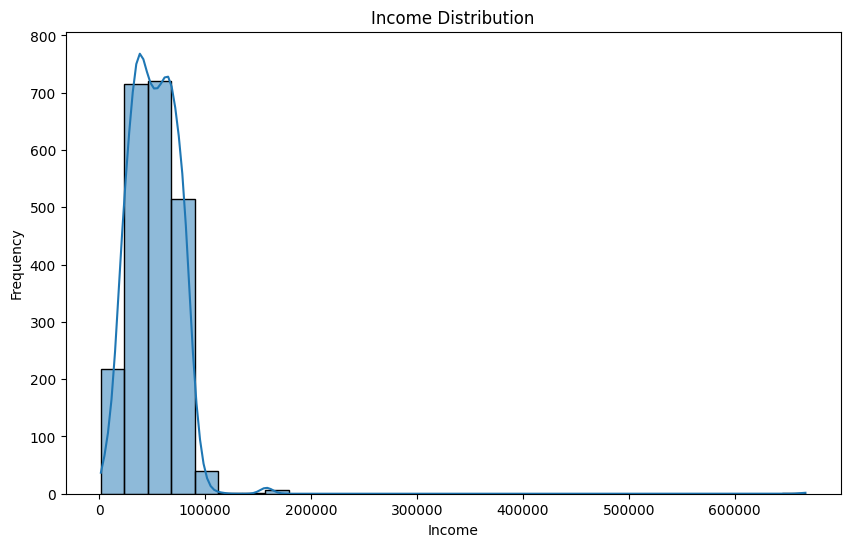

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(data_dup['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


Since the data is left skewed we will replace the missing values with median

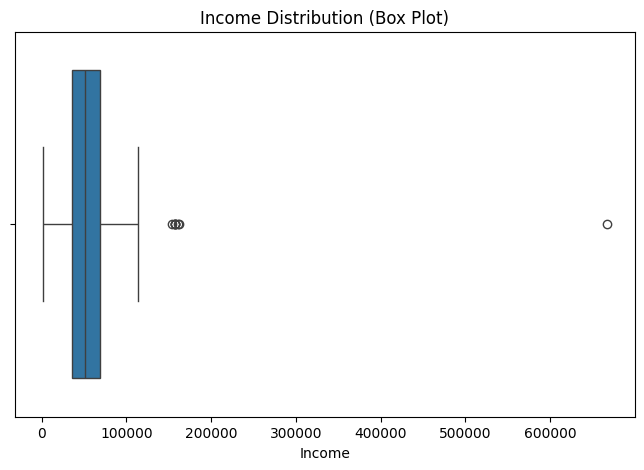

In [78]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Income', data=data_dup)
plt.title('Income Distribution (Box Plot)')
plt.show()


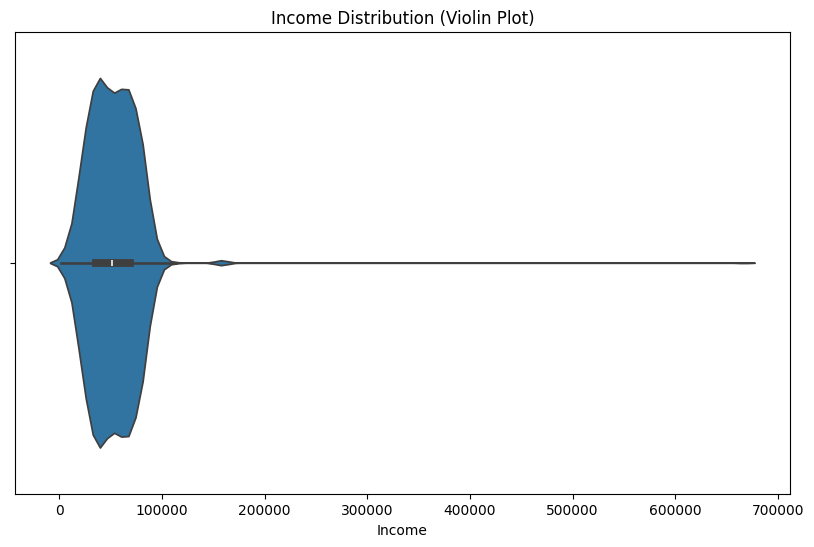

In [79]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Income', data=data_dup)
plt.title('Income Distribution (Violin Plot)')
plt.show()


In [80]:
data_dup['Income'].median()

51381.5

In [82]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES.. 
data_dup['Income']=data_dup['Income'].fillna(data_dup['Income'].median())

In [83]:
data_dup.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [84]:
data_dup['Income'].median()

51381.5

In [79]:
###############
############


Q1 = data_dup['Income'].quantile(0.25)
Q3 = data_dup['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data_dup[(data_dup['Income'] < lower_bound) | (data_dup['Income'] > upper_bound)]

# Display outliers
print("Number of outliers:", outliers.shape[0])
print(outliers)

Number of outliers: 8
         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Married  157243.0        0   
617    1503        1976         PhD       Together  162397.0        1   
655    5555        1975  Graduation       Divorced  153924.0        0   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
1653   4931        1977  Graduation       Together  157146.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
164          1  2014-03-01       98        20  ...                  0   
617          1  2013-06-03       31        85  ...                  1   
655          0  2014-02-07       81         1  ...                  0   
687          0  2012-08-04  

In [82]:
########################
lower_percentile = data_dup['Income'].quantile(0.05)
upper_percentile = data_dup['Income'].quantile(0.95)
data_dup['Income_Capped'] = data_dup['Income'].apply(lambda x: max(min(x, upper_percentile), lower_percentile))

In [48]:
######################
data_dup = data_dup.dropna()
data_dup.shape

(2216, 29)

### 6.Checking for duplicate values

In [85]:
data_dup.duplicated().sum()

0

### 7.Checking for unique values

In [86]:
data_dup.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

"Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , they are not going to contribute anything in the model building. So we can drop them.

In [48]:
data_dup=data_dup.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)


In [87]:
data_dup.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , they are not going to contribute anything in the model building. So we can drop them.

In [154]:
data_dup=data_dup.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

## Univariate Analysis

1. Analysis on Year_Birth Variable 

In [88]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Year_Birth"
print("Unique categories present in the Year_Birth:",data_dup["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64


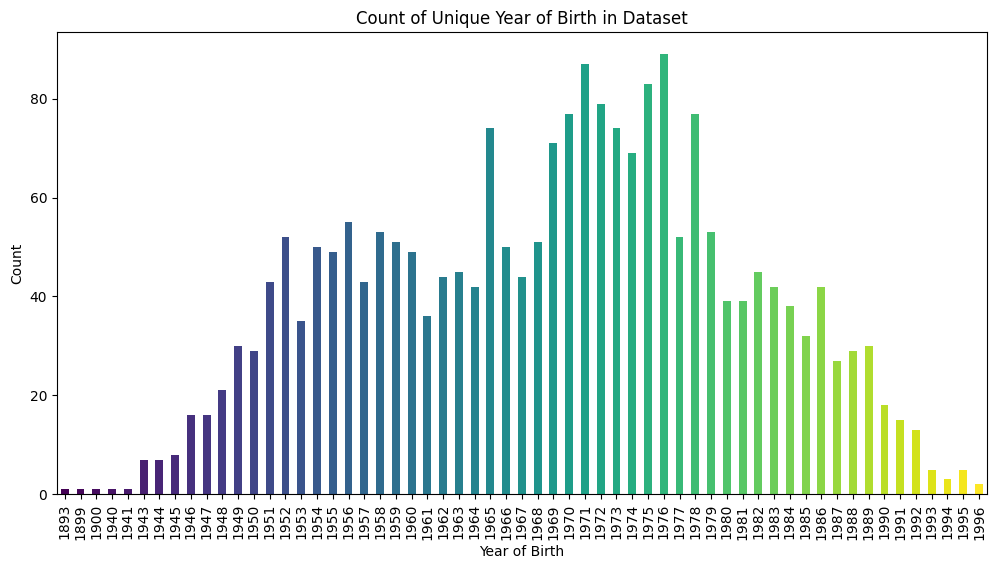

In [102]:
def plot_year_birth_count(data_dup):
    if 'Year_Birth' in data_dup.columns:
        count_series = data_dup['Year_Birth'].value_counts().sort_index()

        # Create a linear gradient of colors
        cmap = plt.get_cmap('viridis')  # You can change 'viridis' to any other colormap
        colors = [cmap(i) for i in np.linspace(0, 1, len(count_series))]

        count_series.plot(kind='bar', figsize=(12, 6), color=colors)
        plt.xlabel('Year of Birth')
        plt.ylabel('Count')
        plt.title('Count of Unique Year of Birth in Dataset')
        plt.show()
    else:
        print("Column 'Year_Birth' not found in the DataFrame.")

# Usage
plot_year_birth_count(data_dup)


In [105]:
data_dup['Education'].unique()

array(['Post Graduate', 'Under Graduate'], dtype=object)

In [104]:
#CHANGING CATEGORY INTO "UG" AND "PG" ONLY....
data_dup['Education'] = data_dup['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
data_dup['Education'] = data_dup['Education'].replace(['Basic'], 'Under Graduate')

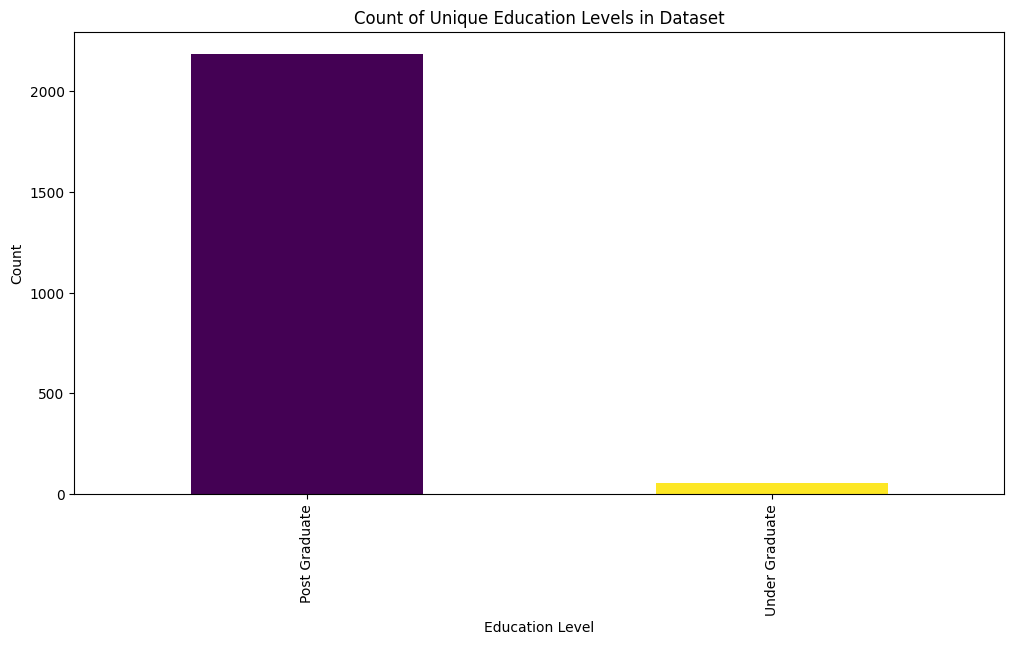

In [107]:
def plot_education_count(data_dup):
    if 'Education' in data_dup.columns:
        count_series = data_dup['Education'].value_counts().sort_index()

        # Create a linear gradient of colors
        cmap = plt.get_cmap('viridis')  # You can change 'viridis' to any other colormap
        colors = [cmap(i) for i in np.linspace(0, 1, len(count_series))]

        count_series.plot(kind='bar', figsize=(12, 6), color=colors)
        plt.xlabel('Education Level')
        plt.ylabel('Count')
        plt.title('Count of Unique Education Levels in Dataset')
        plt.show()
    else:
        print("Column 'Education' not found in the DataFrame.")

# Usage
plot_education_count(data_dup)

In [109]:
data_dup['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [110]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
data_dup['Marital_Status'] = data_dup['Marital_Status'].replace(['Married', 'Together'],'Relationship')
data_dup['Marital_Status'] = data_dup['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

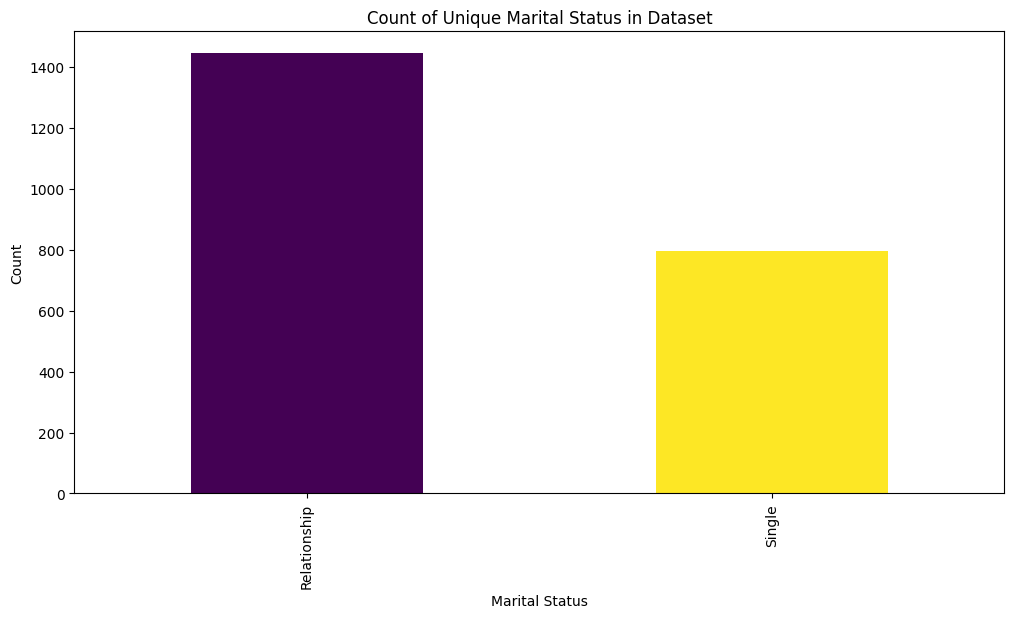

In [111]:
def plot_marital_status_count(data_dup):
    if 'Marital_Status' in data_dup.columns:
        count_series = data_dup['Marital_Status'].value_counts().sort_index()

        # Create a linear gradient of colors
        cmap = plt.get_cmap('viridis')  # You can change 'viridis' to any other colormap
        colors = [cmap(i) for i in np.linspace(0, 1, len(count_series))]

        count_series.plot(kind='bar', figsize=(12, 6), color=colors)
        plt.xlabel('Marital Status')
        plt.ylabel('Count')
        plt.title('Count of Unique Marital Status in Dataset')
        plt.show()
    else:
        print("Column 'Marital_Status' not found in the DataFrame.")

# Usage
plot_marital_status_count(data_dup)

In [112]:
data_dup['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

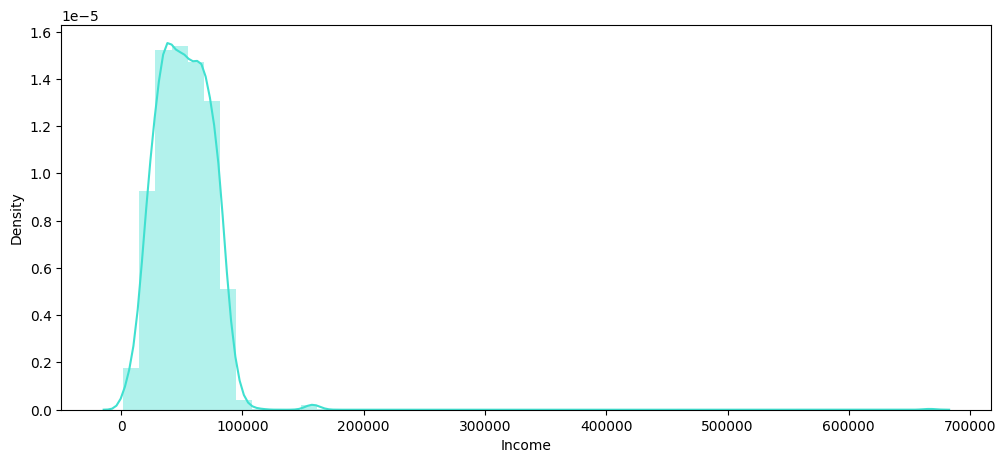

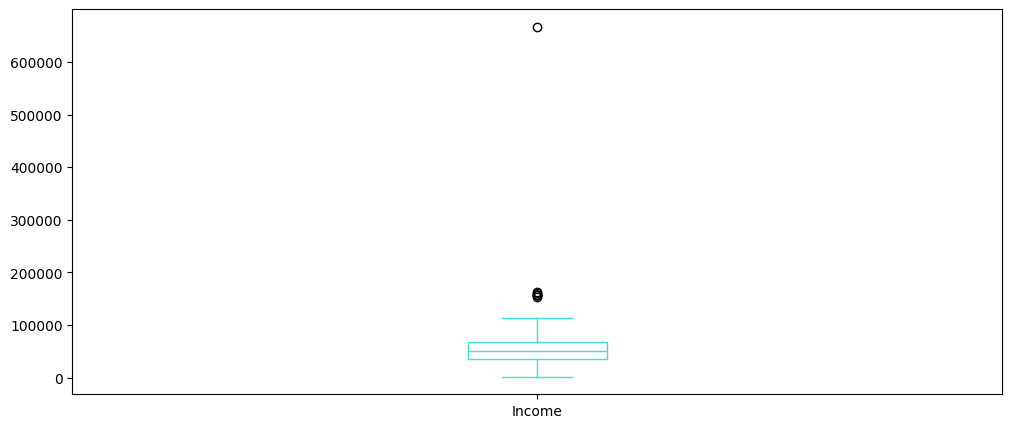

In [113]:
plt.figure(figsize=(12,5))
sns.distplot(data_dup["Income"],color = 'turquoise')
plt.show()
data_dup["Income"].plot.box(figsize=(12,5),color = 'turquoise')
plt.show()

The income column is left skewed as we saw earrlier but it has some outliers that we will treat it in later stage while model building

5. Analysis On "Kidhome,Teenhome" Variable.

In [115]:
data_dup['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [116]:
data_dup['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [117]:
# Combining different dataframe into a single column to reduce the number of dimension

data_dup['Kids'] = data_dup['Kidhome'] + data_dup['Teenhome']

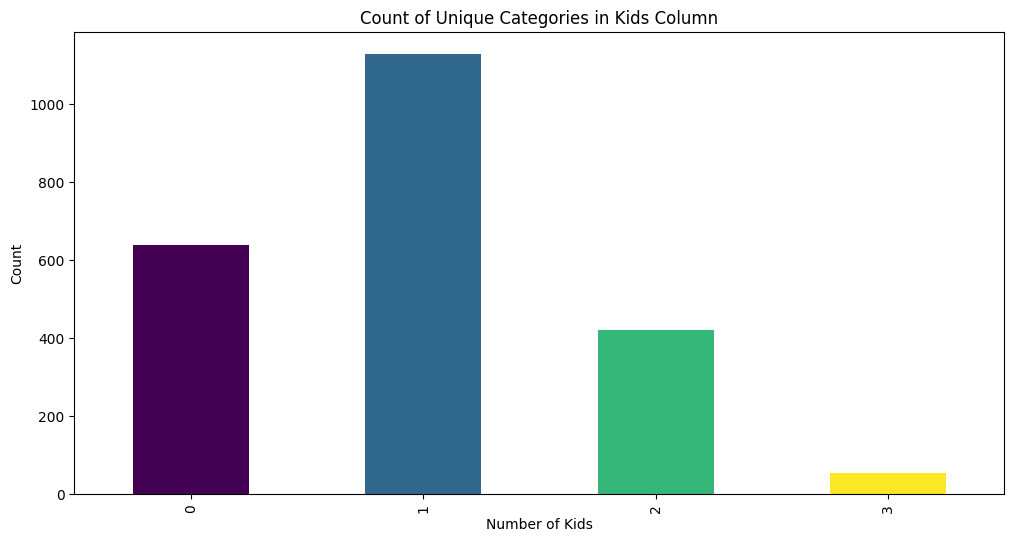

In [118]:
def plot_kids_count(data_dup):
    if 'Kids' in data_dup.columns:  # Replace 'Num_Kids' with your actual column name
        count_series = data_dup['Kids'].value_counts().sort_index()

        # Create a linear gradient of colors
        cmap = plt.get_cmap('viridis')  # You can change 'viridis' to any other colormap
        colors = [cmap(i) for i in np.linspace(0, 1, len(count_series))]

        count_series.plot(kind='bar', figsize=(12, 6), color=colors)
        plt.xlabel('Number of Kids')  # Update the label accordingly
        plt.ylabel('Count')
        plt.title('Count of Unique Categories in Kids Column')  # Update the title accordingly
        plt.show()
    else:
        print("Column 'Kids' not found in the DataFrame.")  # Update the error message accordingly

# Usage
plot_kids_count(data_dup)

50.35% of Customers in the dataset have 1 kid. 28.48% of Customers in the dataset have no kids. 18.79% of Customers in the dataset have 2 kids. 2.36% of Customers in the dataset have 3 kids.

6. Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variable.

In [119]:
data_dup[['MntFruits','MntMeatProducts']].head()

,MntFruits,MntMeatProducts
0,88,546
1,1,6
2,49,127
3,4,20
4,43,118


In [120]:
data_dup['MntFishProducts'].nunique()

182

In [121]:
data_dup['MntFruits'].nunique()

158

In [126]:
# Combining different dataframe into a single column to reduce the number of dimension

data_dup['Expenses'] = data_dup['MntWines'] + data_dup['MntFruits'] + data_dup['MntMeatProducts'] + data_dup['MntFishProducts'] + data_dup['MntSweetProducts'] + data_dup['MntGoldProds']
data_dup['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [127]:
data_dup['Expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenses, dtype: float64

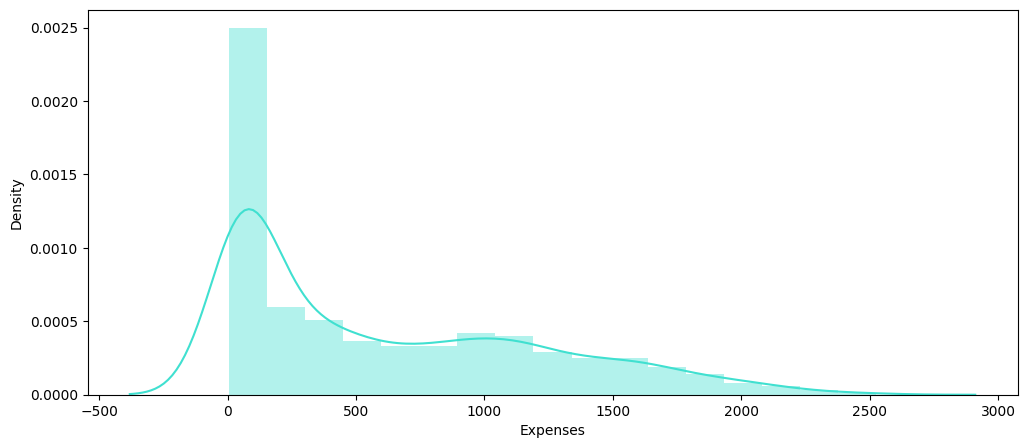

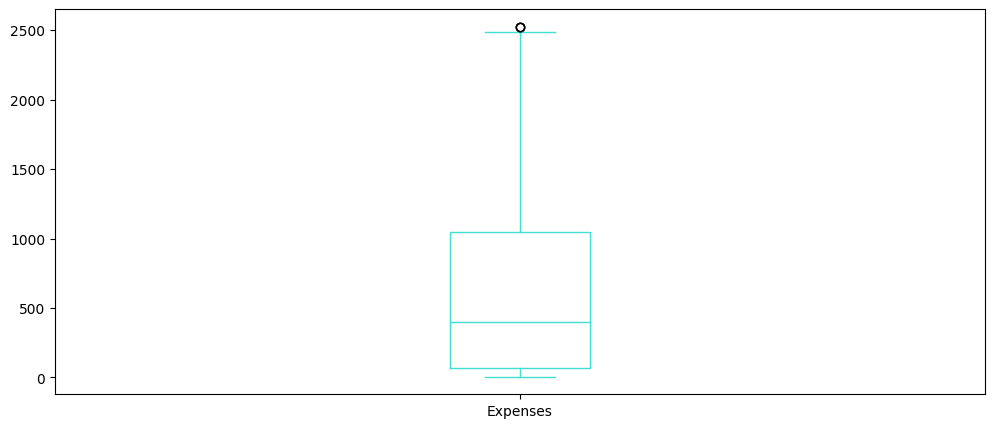

In [129]:
plt.figure(figsize=(12,5))
sns.distplot(data_dup["Expenses"],color = 'turquoise')
plt.show()
data_dup["Expenses"].plot.box(figsize=(12,5),color='turquoise')
plt.show()

The distribution of expenses is uniform

7.Analysis on
AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5" Variable.

In [130]:
data_dup['AcceptedCmp1'].unique()

array([0, 1], dtype=int64)

In [131]:
data_dup['AcceptedCmp2'].unique()

array([0, 1], dtype=int64)

In [132]:
data_dup['TotalAcceptedCmp'] = data_dup['AcceptedCmp1'] + data_dup['AcceptedCmp2'] + data_dup['AcceptedCmp3'] + data_dup['AcceptedCmp4'] + data_dup['AcceptedCmp5']

Unique categories present in the TotalAcceptedCmp: TotalAcceptedCmp
0    1777
1     325
2      83
3      44
4      11
Name: count, dtype: int64




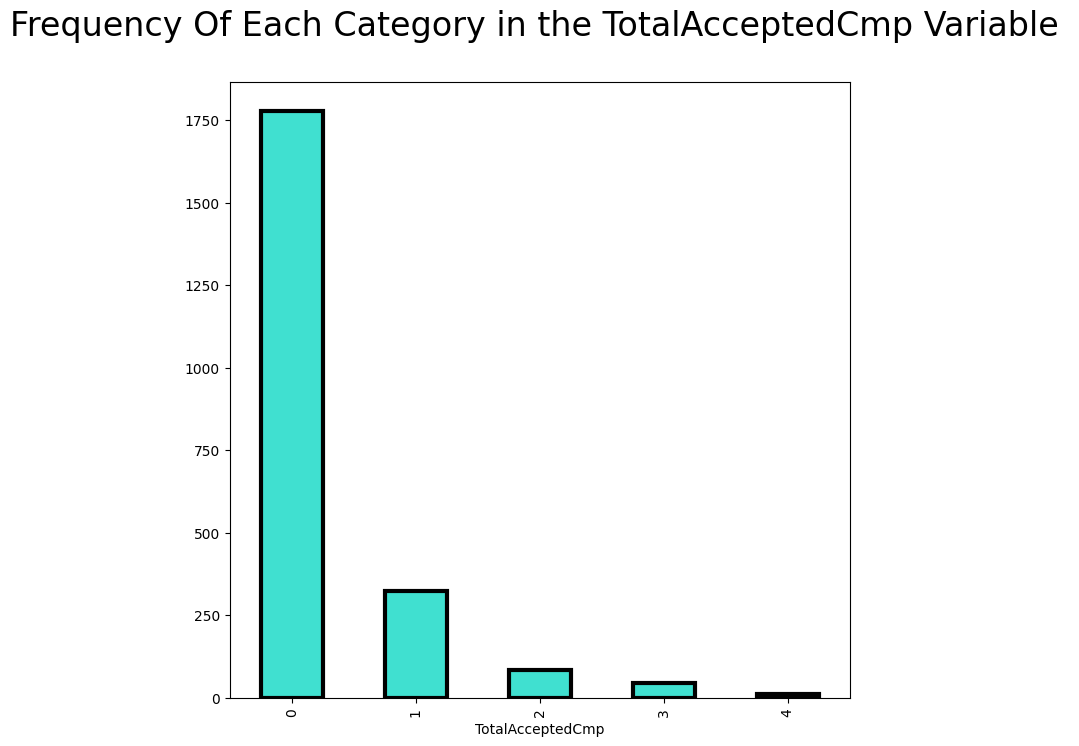

In [133]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"
print("Unique categories present in the TotalAcceptedCmp:",data_dup['TotalAcceptedCmp'].value_counts())
print("\n")

#VISUALIZING THE "TotalAcceptedCmp"


plt.figure(figsize=(8,8))
data_dup['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)
plt.show()

79.33% of Customers accepted the offer in the campaign are "0". 14.50% of Customers accepted the offer in the campaign are "1". 3.70% of Customers accepted the offer in the campaign are "2". 1.96% of Customers accepted the offer in the campaign are "3". 0.49% of Customers accepted the offer in the campaign are "4".

8.Analysis on "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" Variable.

In [134]:
data_dup['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25],
      dtype=int64)

In [135]:
data_dup['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22],
      dtype=int64)

In [136]:
data_dup['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1],
      dtype=int64)

In [137]:
data_dup['NumTotalPurchases'] = data_dup['NumWebPurchases'] + data_dup['NumCatalogPurchases'] + data_dup['NumStorePurchases'] + data_dup['NumDealsPurchases']
data_dup['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [138]:
data_dup[['NumTotalPurchases']]

,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [139]:
data_dup['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

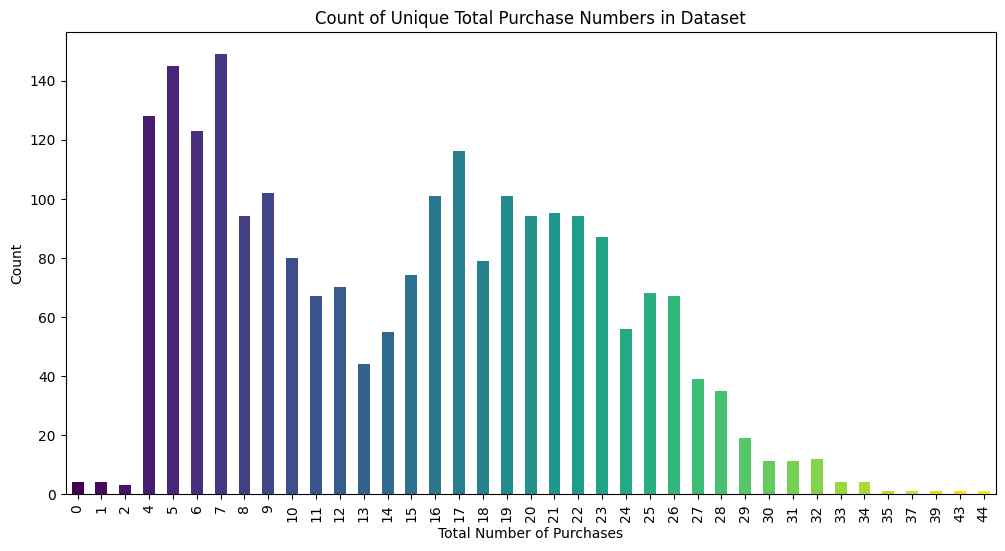

In [140]:
def plot_num_total_purchases_count(data_dup):
    if 'NumTotalPurchases' in data_dup.columns:
        count_series = data_dup['NumTotalPurchases'].value_counts().sort_index()

        # Create a linear gradient of colors
        cmap = plt.get_cmap('viridis')  # You can change 'viridis' to any other colormap
        colors = [cmap(i) for i in np.linspace(0, 1, len(count_series))]

        count_series.plot(kind='bar', figsize=(12, 6), color=colors)
        plt.xlabel('Total Number of Purchases')
        plt.ylabel('Count')
        plt.title('Count of Unique Total Purchase Numbers in Dataset')
        plt.show()
    else:
        print("Column 'NumTotalPurchases' not found in the DataFrame.")

# Usage
plot_num_total_purchases_count(data_dup)

In [141]:
data_dup.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,0,1617,0,25
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,2,27,0,6
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,0,776,0,21
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,1,53,0,8
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,1,422,0,19


9. Converting the Year_Birth to customer_Age

In [142]:
#ADDING A COLUMN "customer_Age" IN THE DATAFRAME....
data_dup['Customer_Age'] = (pd.Timestamp('now').year) - data_dup['Year_Birth']
data_dup.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,0,1617,0,25,67
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,2,27,0,6,70
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,0,776,0,21,59
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,1,53,0,8,40
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,1,422,0,19,43


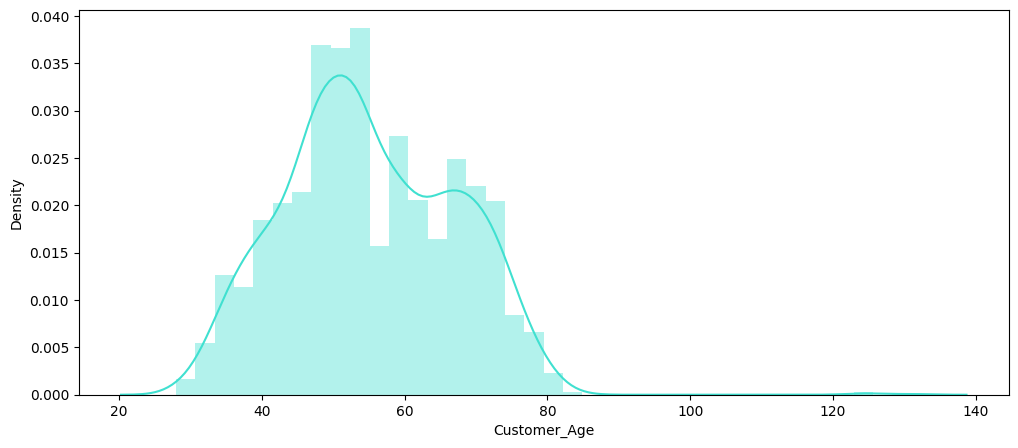

In [143]:
plt.figure(figsize=(12,5))
sns.distplot(data_dup["Customer_Age"],color = 'turquoise')
plt.show()

Most of the cutomers we have are in middle age i.e between 35-55

In [144]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data_dup=data_dup.drop(columns=col_del,axis=1)

In [145]:
data_dup.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Z_CostContact,Z_Revenue,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Post Graduate,Single,58138.0,2012-09-04,58,0,3,11,1,0,1617,0,25,67
1,Post Graduate,Single,46344.0,2014-03-08,38,0,3,11,0,2,27,0,6,70
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,3,11,0,0,776,0,21,59
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,3,11,0,1,53,0,8,40
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,3,11,0,1,422,0,19,43


In [146]:
data_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Dt_Customer        2240 non-null   object 
 4   Recency            2240 non-null   int64  
 5   Complain           2240 non-null   int64  
 6   Z_CostContact      2240 non-null   int64  
 7   Z_Revenue          2240 non-null   int64  
 8   Response           2240 non-null   int64  
 9   Kids               2240 non-null   int64  
 10  Expenses           2240 non-null   int64  
 11  TotalAcceptedCmp   2240 non-null   int64  
 12  NumTotalPurchases  2240 non-null   int64  
 13  Customer_Age       2240 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 245.1+ KB


In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

In [147]:
data_dup["Dt_Customer"] = pd.to_datetime(data_dup["Dt_Customer"])
dates = []
for i in data_dup["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [148]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data_dup["Customer_For"] = days
data_dup['Customer_For'] = data_dup['Customer_For'].apply(lambda x:x.days)

In [149]:
data_dup.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Z_CostContact,Z_Revenue,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,2012-09-04,58,0,3,11,1,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2014-03-08,38,0,3,11,0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,3,11,0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,3,11,0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,3,11,0,1,422,0,19,43,161


In [150]:
data_dup['Customer_For'].describe()

count    2240.000000
mean      353.582143
std       202.122512
min         0.000000
25%       180.750000
50%       355.500000
75%       529.000000
max       699.000000
Name: Customer_For, dtype: float64

In [151]:
data_dup.drop(['Dt_Customer','Recency','Complain','Response'],axis=1,inplace=True)

In [156]:
data_dup.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,43,161


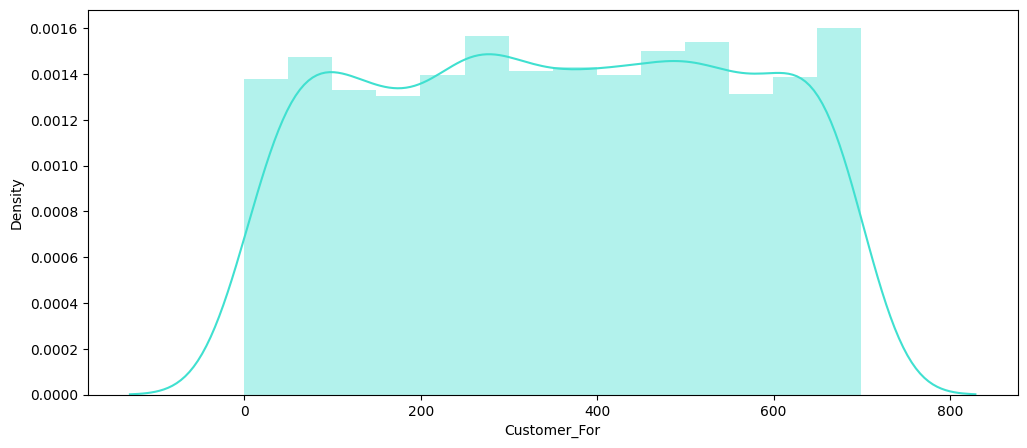

In [155]:
plt.figure(figsize=(12,5))

sns.distplot(data_dup["Customer_For"],color = 'turquoise')
plt.show()

In [157]:
data_dup.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,43,161


In [158]:
data_dup.shape

(2240, 9)

## Bivariate Analysis

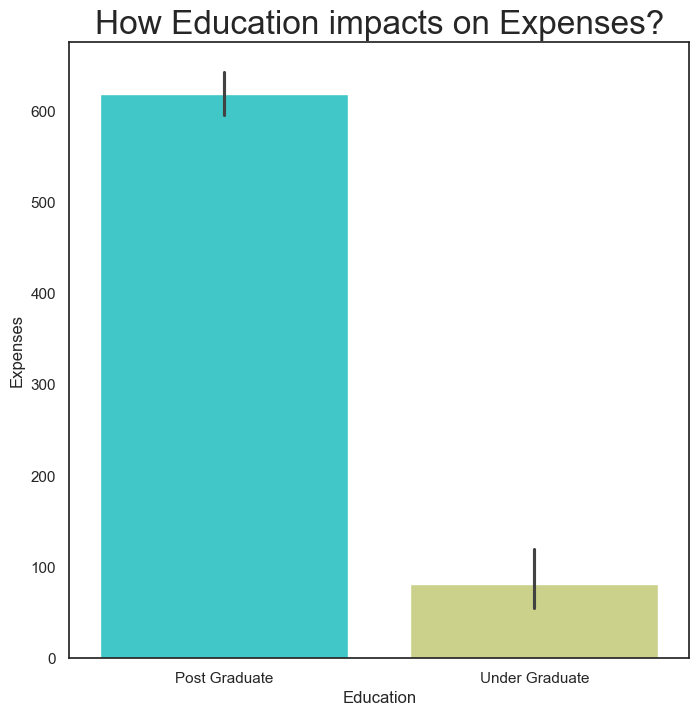

In [159]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Education impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=data_dup,palette="rainbow")

We observe that the post graduated people spends more than the UG people

2.Marital status vs Expenses

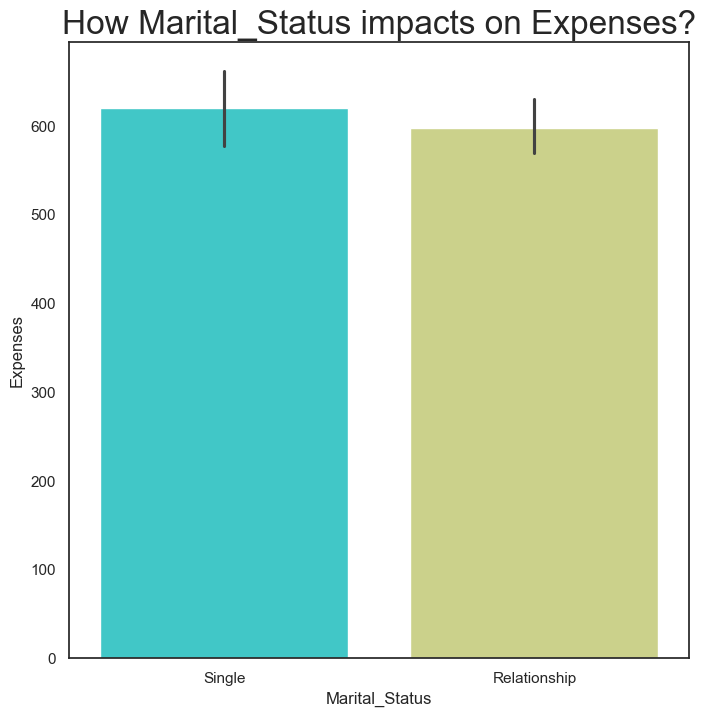

In [161]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=data_dup,palette="rainbow")

We observe that single and married people have the same spendings



3.Kids vs Expenses

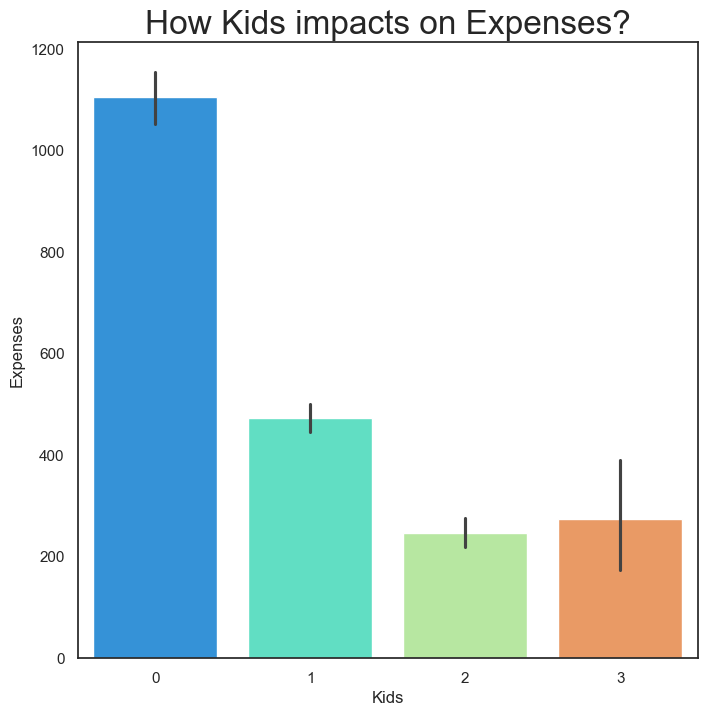

In [162]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Kids", y="Expenses", data=data_dup,palette="rainbow")

Here we observe some thing different that parents with 1 kid spends more than the parents who are having 2 or 3 kids

4.TotalAcceptedCmp vs Expenses

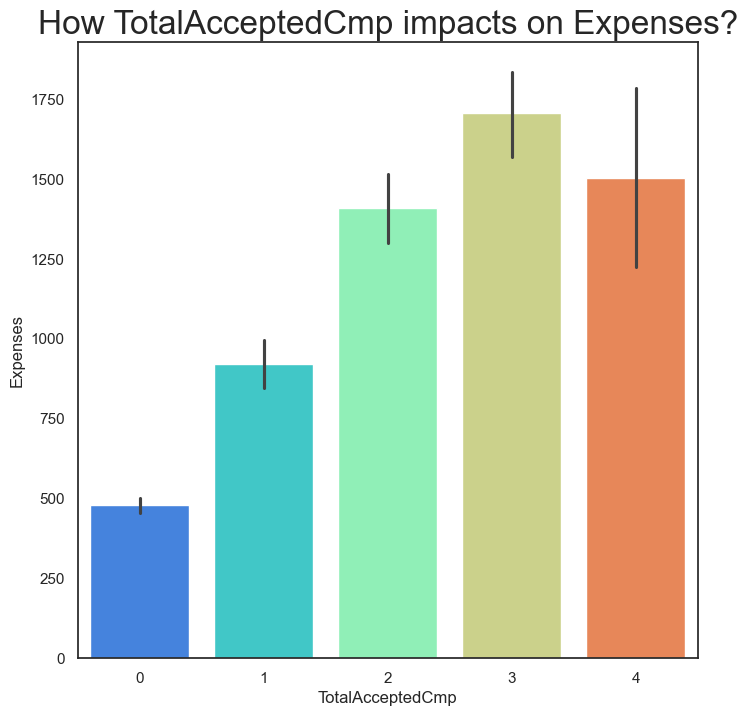

In [164]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How TotalAcceptedCmp impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=data_dup,palette="rainbow")

those who accepeted more campaign have more expenses

5. NumTotalPurchases vs Expenses



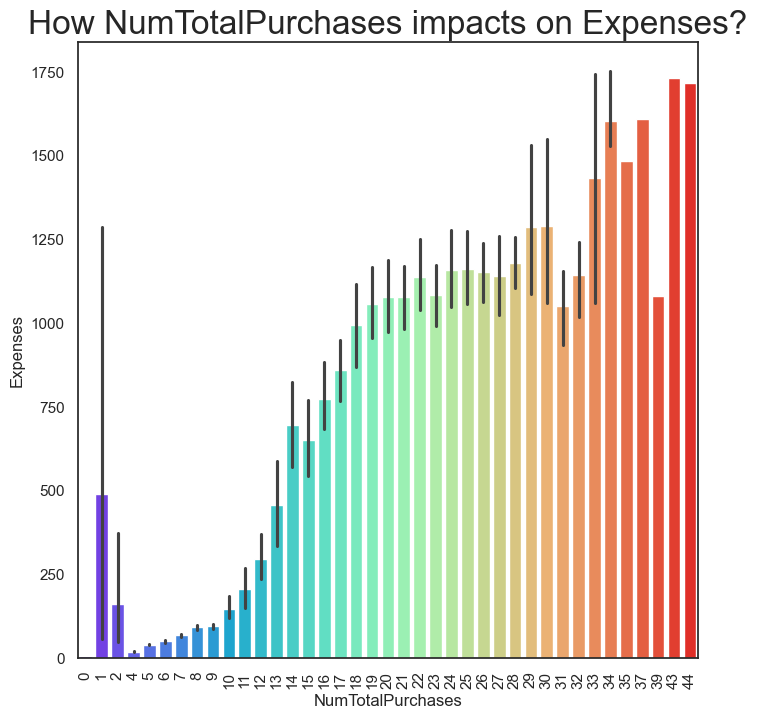

In [166]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How NumTotalPurchases impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="NumTotalPurchases", y="Expenses", data=data_dup,palette="rainbow")

Those who have more purchases have more expenses

6.Day engaged vs Expenses

In [167]:
data_dup.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age',
       'Customer_For'],
      dtype='object')

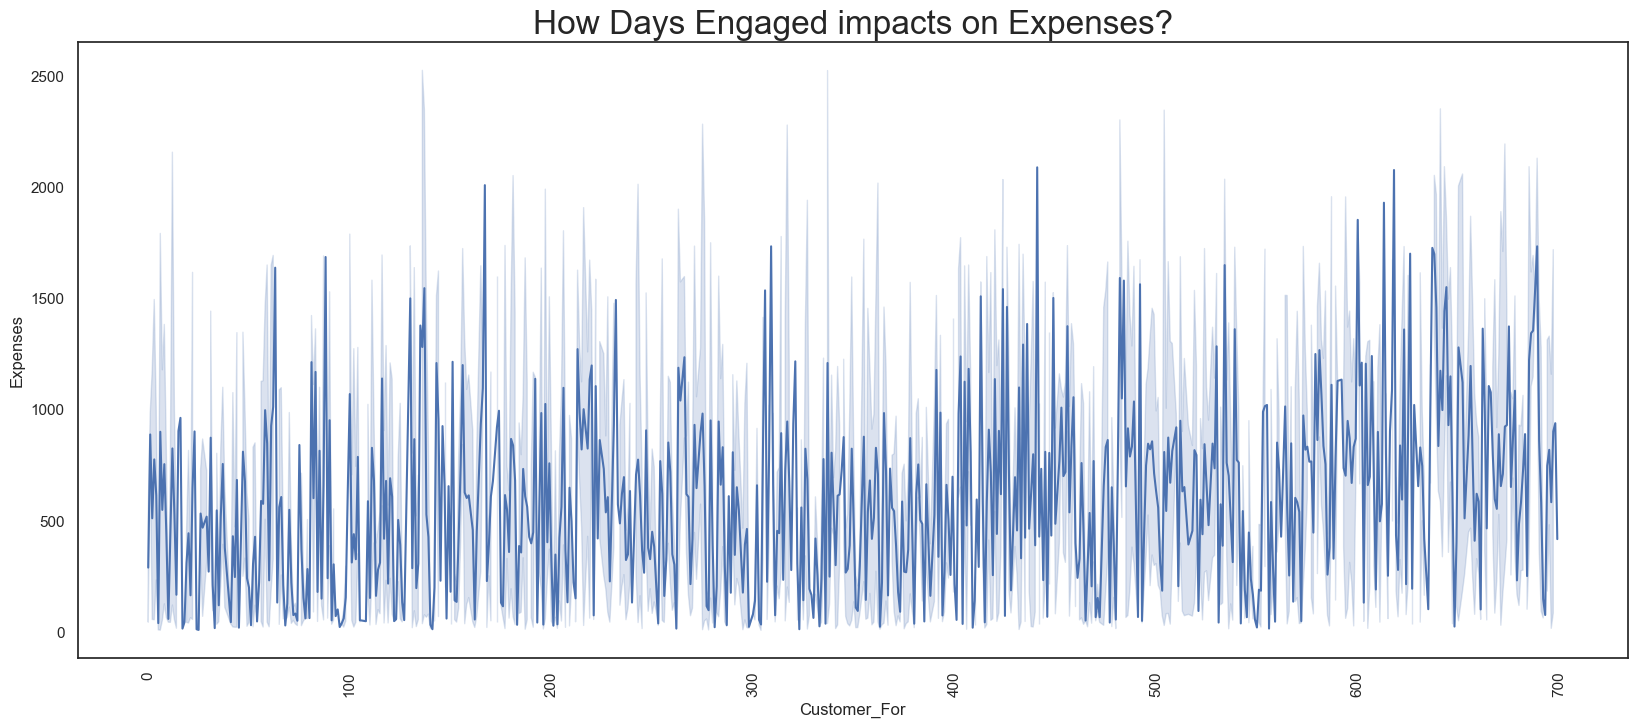

In [168]:
sns.set_theme(style="white")
plt.figure(figsize=(20,8))
plt.title("How Days Engaged impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.lineplot(x="Customer_For", y="Expenses", data=data_dup,palette="rainbow")

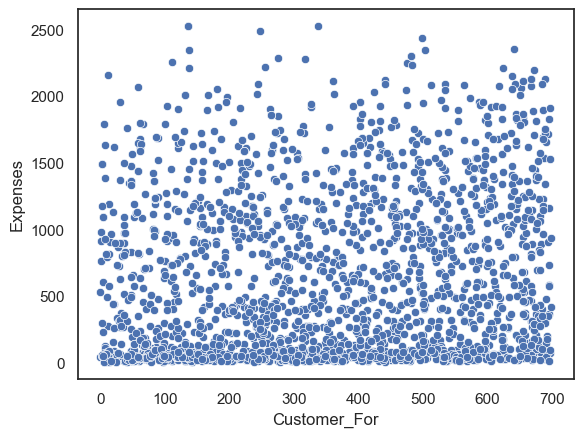

In [170]:
sns.scatterplot(x=data_dup['Customer_For'], y=data_dup['Expenses'])

plt.show()

No relationship between days enagaged vs expenses

7.Customer Age vs Expenses

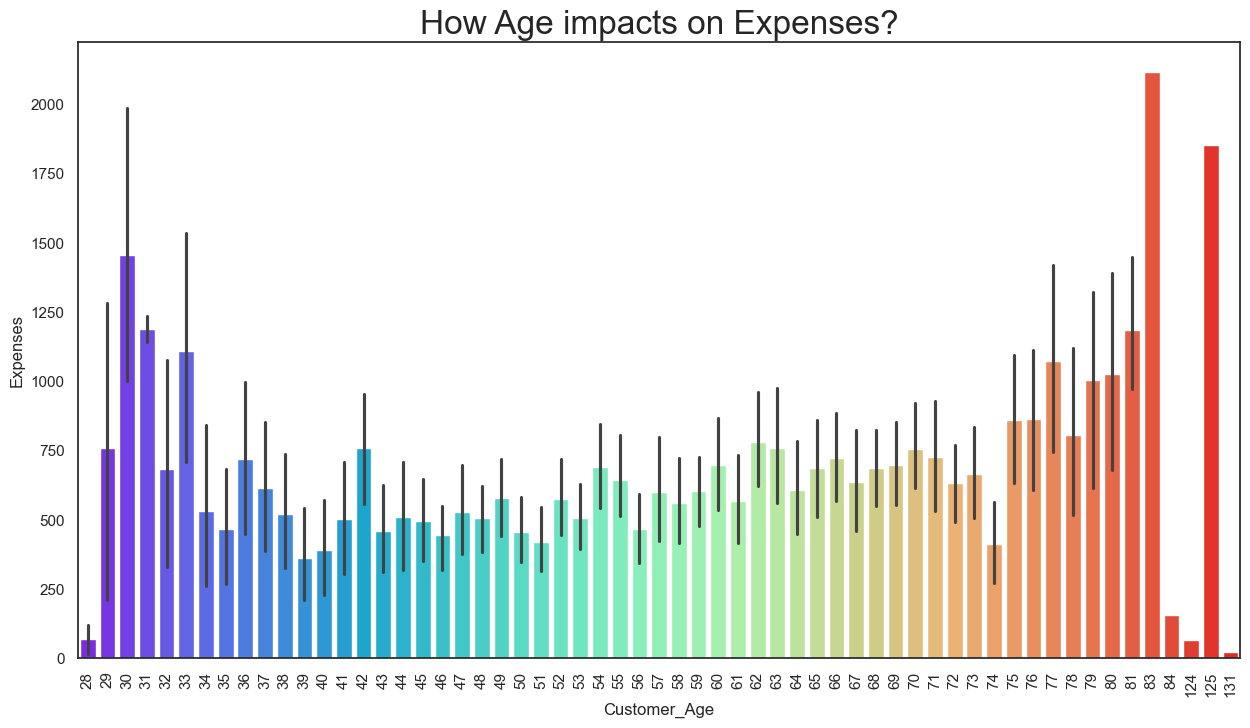

In [171]:
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
plt.title("How Age impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="Customer_Age", y="Expenses", data=data_dup,palette="rainbow")

plt.show()

People who are in middle age have less expenses than others

### Remove some outliers present in age and income

In [172]:
data_dup['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [173]:
data_dup['Customer_For'].describe()

count    2240.000000
mean      353.582143
std       202.122512
min         0.000000
25%       180.750000
50%       355.500000
75%       529.000000
max       699.000000
Name: Customer_For, dtype: float64

In [174]:
data_dup.shape

(2240, 9)

In [175]:
data_dup.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,43,161


Finding the correlation

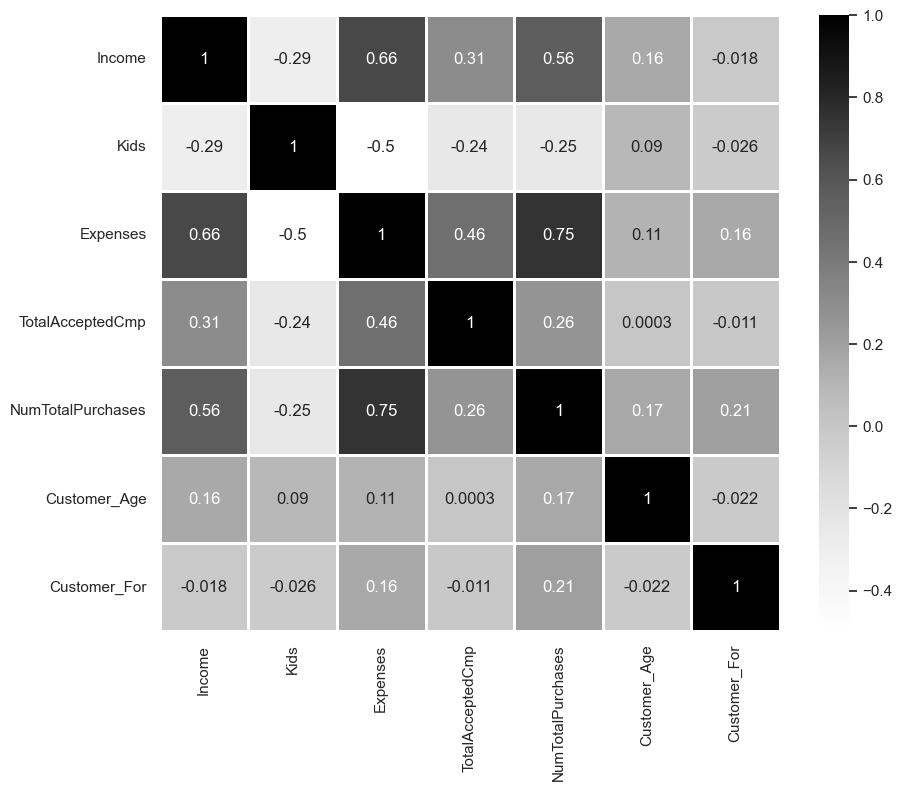

In [177]:
numeric_data = data_dup.select_dtypes(include=[np.number])

# Computing the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greys', linewidths=1)
plt.show()

Income is more positively correlated to Expenses and Number of purchases

Expenses is positively correlated to Income and Number of pur chases and negitively correlated with Kids